# Computer Assignment 1

---

**Instructor:** Dr. Dastgheib  
**Course:** Convex Optimization  
**Student:** Mohammad Mobin Jelodar  
**Student ID:** 402101493  

---


## Problem 1(a) — Interpreting the constraints

We consider a two-asset risky portfolio with weights
$$
x=\begin{bmatrix}x_1\\x_2\end{bmatrix}.
$$

### 1) Budget simplex $P$
$$
x_1\ge 0,\quad x_2\ge 0,\quad x_1+x_2\le 1.
$$
- $x_1,x_2\ge 0$: no short-selling.
- $x_1+x_2\le 1$: invest at most 100% in risky assets (the rest is cash / risk-free).

### 2) Risk budget (second-order cone) constraint
$$
\|R_{\text{risk}}x\|_2\le \sigma_{\max}.
$$
This limits a convex measure of risk. Since $R_{\text{risk}}x$ is linear in $x$ and $\|\cdot\|_2$ is convex, the feasible set is convex. Intuitively, it prevents the portfolio from becoming “too risky”.

### 3) Turnover / transaction limit ($\ell_1$-ball) constraint
$$
\|x-x_0\|_1\le \tau_{\max}.
$$
This bounds how much we can deviate from the current holdings $x_0$. The $\ell_1$-norm sums absolute changes in weights, so it is a common proxy for total rebalancing (transaction costs / turnover).

### 4) Exposure / concentration constraint via log-sum-exp
$$
\log\!\big(e^{\beta x_1}+e^{\beta x_2}\big)\le \log(C_{\max}).
$$
Equivalently,
$$
e^{\beta x_1}+e^{\beta x_2}\le C_{\max}.
$$
The function $\log\!\big(e^{\beta x_1}+e^{\beta x_2}\big)$ is the **log-sum-exp**, a smooth convex approximation of $\max(\beta x_1,\beta x_2)$. Therefore, this constraint discourages concentrating too much weight on a single asset.


## Problem 1(b) — Grid-based visualization of individual constraints

In this part, we visualize each constraint separately in the $(x_1,x_2)$ plane using a uniform two-dimensional grid over the square $[0,1]\times[0,1]$.

For each grid point, we check whether the corresponding portfolio vector satisfies a given constraint. This produces a Boolean *feasibility mask* that allows us to plot the feasible region of each constraint numerically.

The purpose of this step is:
- to gain geometric intuition about each constraint,
- and to prepare for visualizing the intersection of all constraints in later parts.

We consider the following four constraint sets:
1. The budget simplex $P$,
2. the risk budget constraint,
3. the turnover (rebalancing) constraint,
4. the exposure (log-sum-exp) constraint.

Each constraint is plotted separately using a grid-based approximation.


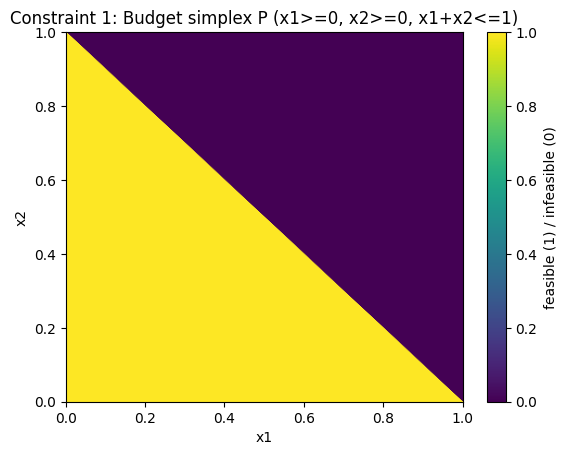

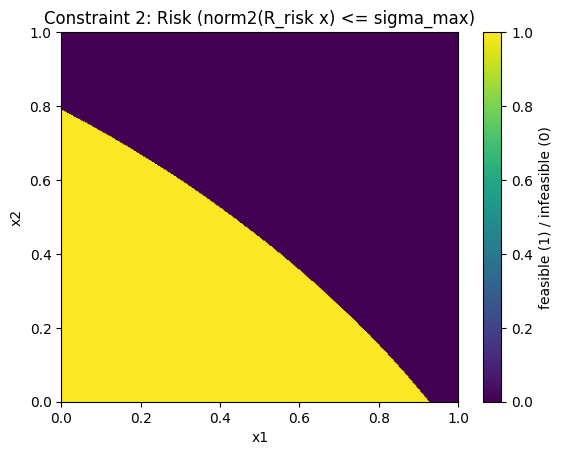

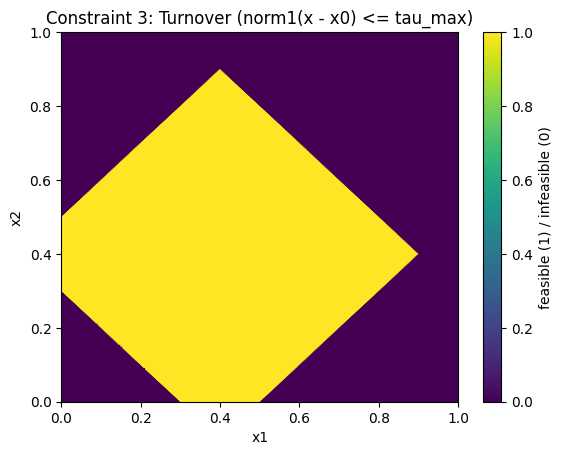

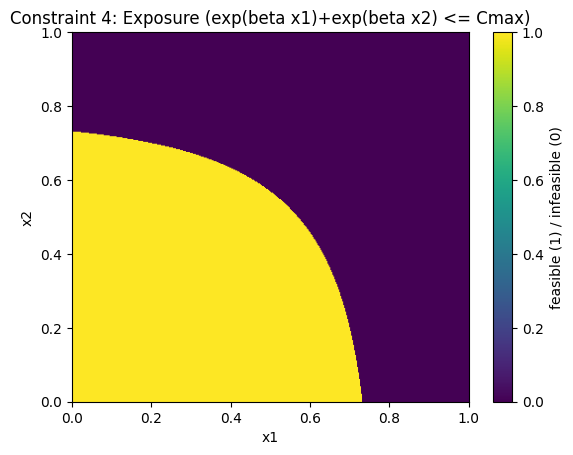

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters (from the assignment)
R_risk = np.array([[0.25, 0.10],
                   [0.10, 0.30]])
x0 = np.array([0.4, 0.4])
sigma_max = 0.25
tau_max   = 0.5
beta = 3.0
Cmax = 10.0

# --- Grid generation ---
def generate_grid(n=401):
    x1 = np.linspace(0, 1, n)
    x2 = np.linspace(0, 1, n)
    X1, X2 = np.meshgrid(x1, x2)
    return x1, x2, X1, X2

# --- Plot helper (NO latex in title) ---
def plot_constraint(mask, title):
    plt.figure()
    plt.imshow(mask.astype(float),
               origin="lower",
               extent=[0, 1, 0, 1],
               aspect="auto")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.colorbar(label="feasible (1) / infeasible (0)")
    plt.show()

# Create grid
x1, x2, X1, X2 = generate_grid()

# (1) Budget simplex P
mask_P = (X1 >= 0) & (X2 >= 0) & (X1 + X2 <= 1)
plot_constraint(mask_P, "Constraint 1: Budget simplex P (x1>=0, x2>=0, x1+x2<=1)")

# (2) Risk constraint: ||R_risk x||_2 <= sigma_max
Rx1 = R_risk[0, 0] * X1 + R_risk[0, 1] * X2
Rx2 = R_risk[1, 0] * X1 + R_risk[1, 1] * X2
mask_risk = np.sqrt(Rx1**2 + Rx2**2) <= sigma_max
plot_constraint(mask_risk, "Constraint 2: Risk (norm2(R_risk x) <= sigma_max)")

# (3) Turnover constraint: ||x - x0||_1 <= tau_max
mask_turnover = (np.abs(X1 - x0[0]) + np.abs(X2 - x0[1]) <= tau_max)
plot_constraint(mask_turnover, "Constraint 3: Turnover (norm1(x - x0) <= tau_max)")

# (4) Exposure constraint: exp(beta x1) + exp(beta x2) <= Cmax
mask_exposure = (np.exp(beta * X1) + np.exp(beta * X2) <= Cmax)
plot_constraint(mask_exposure, "Constraint 4: Exposure (exp(beta x1)+exp(beta x2) <= Cmax)")


## Problem 1(c) — Plotting the intersection set $C_{\mathrm{adv}}$

In this part, we visualize the feasible set obtained by combining **all** constraints together.  
Let the decision vector be $x = [x_1, x_2]^T$. We define the advanced feasible set as the intersection

$$
C_{\mathrm{adv}}
=
P
\;\cap\;
\left\{x \;\middle|\; \|R_{\mathrm{risk}}x\|_2 \le \sigma_{\max}\right\}
\;\cap\;
\left\{x \;\middle|\; \|x-x_0\|_1 \le \tau_{\max}\right\}
\;\cap\;
\left\{x \;\middle|\; \log\!\big(e^{\beta x_1}+e^{\beta x_2}\big)\le \log(C_{\max})\right\}.
$$

### Grid-based approximation
Since the problem is two-dimensional, we approximate $C_{\mathrm{adv}}$ numerically on a uniform grid over $[0,1]\times[0,1]$:
- For each grid point $(x_1,x_2)$, we evaluate all constraints.
- Each constraint produces a Boolean feasibility mask (True/False).
- The intersection set is obtained by taking the logical AND of all masks:
  a point is feasible in $C_{\mathrm{adv}}$ **iff** it satisfies every constraint simultaneously.

This method does not compute an exact boundary, but it provides a clear geometric intuition and is sufficient for visualization.

### Overlaying the simplex boundary
To better understand how the advanced constraints interact with the basic budget constraint, we overlay the boundary of the simplex $P$:
- the axes $x_1=0$ and $x_2=0$,
- and the line $x_1+x_2=1$.

This allows us to see which constraints are active and how much the feasible region shrinks compared to the original simplex.


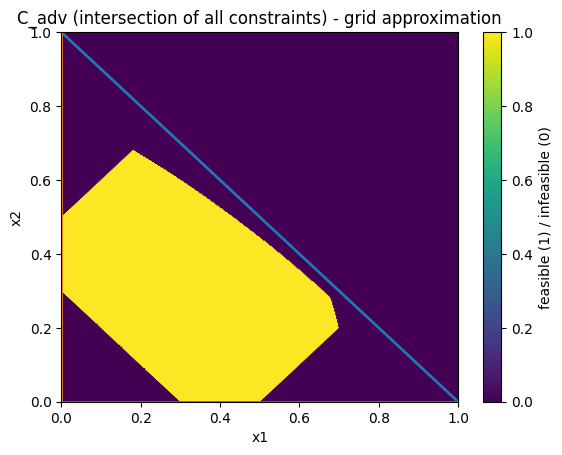

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Intersection mask: C_adv = P ∩ risk ∩ turnover ∩ exposure
mask_C_adv = mask_P & mask_risk & mask_turnover & mask_exposure

plt.figure()
plt.imshow(mask_C_adv.astype(float),
           origin="lower",
           extent=[0, 1, 0, 1],
           aspect="auto")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("C_adv (intersection of all constraints) - grid approximation")
plt.colorbar(label="feasible (1) / infeasible (0)")

# Overlay the simplex boundary of P: x1 + x2 = 1
xx = np.linspace(0, 1, 400)
plt.plot(xx, 1 - xx, linewidth=2)   # x1+x2=1
plt.plot([0, 0], [0, 1], linewidth=2)  # x1=0 axis line
plt.plot([0, 1], [0, 0], linewidth=2)  # x2=0 axis line

plt.show()


## Problem 1(d) — Convexity of the constraints and DCP forms in CVXPY

In this part, we justify that each constraint defining $C_{\mathrm{adv}}$ is convex, and we write its **Disciplined Convex Programming (DCP)** form as used in CVXPY.

### (1) Budget simplex constraints
$$
x_1 \ge 0,\quad x_2 \ge 0,\quad x_1+x_2 \le 1.
$$
These are affine (linear) inequalities, so their feasible set is a convex polyhedron (in fact, a simplex).

**CVXPY (DCP):**
- `x[0] >= 0`
- `x[1] >= 0`
- `x[0] + x[1] <= 1`

### (2) Risk budget constraint (second-order cone)
$$
\|R_{\mathrm{risk}}x\|_2 \le \sigma_{\max}.
$$
The mapping $x \mapsto R_{\mathrm{risk}}x$ is linear, and the $\ell_2$-norm is convex.  
A sublevel set of a convex function is convex, therefore this constraint defines a convex feasible region (a norm ball after a linear map).

**CVXPY (DCP):**
- `cp.norm(R_risk @ x, 2) <= sigma_max`

### (3) Turnover constraint ($\ell_1$-norm)
$$
\|x-x_0\|_1 \le \tau_{\max}.
$$
The $\ell_1$-norm is convex, and $x \mapsto x-x_0$ is an affine map.  
Hence the function $x \mapsto \|x-x_0\|_1$ is convex, and its sublevel set is convex.

**CVXPY (DCP):**
- `cp.norm(x - x0, 1) <= tau_max`

### (4) Exposure / concentration constraint (log-sum-exp)
$$
\log\!\big(e^{\beta x_1}+e^{\beta x_2}\big) \le \log(C_{\max}).
$$
The function $\log\!\left(\sum_i e^{u_i}\right)$ is the **log-sum-exp**, which is convex.  
Since $\beta x$ is affine in $x$, the composition $x \mapsto \log\!\big(e^{\beta x_1}+e^{\beta x_2}\big)$ remains convex.  
Therefore, its sublevel set is convex as well.

An equivalent form is:
$$
e^{\beta x_1}+e^{\beta x_2}\le C_{\max},
$$
which is also convex because the exponential function is convex and the sum of convex functions is convex.

**CVXPY (DCP):**
- `cp.log_sum_exp(beta * x) <= np.log(Cmax)`

### Conclusion
All constraints are convex, therefore $C_{\mathrm{adv}}$ is convex as an intersection of convex sets. This is why the projection problem in the next part is a convex optimization problem and can be solved reliably using CVXPY.


In [8]:
import numpy as np
import cvxpy as cp

R_risk = np.array([[0.25, 0.10],
                   [0.10, 0.30]])
x0 = np.array([0.4, 0.4])
sigma_max = 0.25
tau_max   = 0.5
beta = 3.0
Cmax = 10.0

x = cp.Variable(2)

constraints = [
    x[0] >= 0,
    x[1] >= 0,
    x[0] + x[1] <= 1,
    cp.norm(R_risk @ x, 2) <= sigma_max,
    cp.norm(x - x0, 1) <= tau_max,
    cp.log_sum_exp(beta * x) <= np.log(Cmax),
]

constraints


[Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Constant(CONSTANT, ZERO, ())),
 Inequality(Expression(AFFINE, UNKNOWN, ())),
 Inequality(Expression(CONVEX, NONNEGATIVE, ())),
 Inequality(Expression(CONVEX, NONNEGATIVE, ())),
 Inequality(Expression(CONVEX, UNKNOWN, ()))]

## Problem 1(e) — Projection onto $C_{\mathrm{adv}}$ (CVXPY)

In this part, we solve the Euclidean projection problem onto the advanced feasible set $C_{\mathrm{adv}}$.

Given a target point $z \in [0,1]^2$, the projection of $z$ onto $C_{\mathrm{adv}}$ is defined as the solution of:

$$
\min_{x}\ \frac{1}{2}\|x - z\|_2^2
\quad \text{s.t.}\quad x \in C_{\mathrm{adv}}.
$$

Because the objective function is a convex quadratic function and $C_{\mathrm{adv}}$ is convex (as shown in part (d)), this is a convex optimization problem with a unique optimal solution whenever $C_{\mathrm{adv}}$ is nonempty.

We generate several random target points $z^{(k)}$ in $[0,1]^2$, solve the projection problem for each one using CVXPY, and report:
- the original target $z^{(k)}$,
- the projected point $x^{(k)\star}$,
- the squared projection error $\|x^{(k)\star} - z^{(k)}\|_2^2$,
- and the solver status (e.g., `optimal`).

Finally, we visualize the targets and their projections by plotting line segments from each $z^{(k)}$ to its projected point $x^{(k)\star}$ on top of the set $C_{\mathrm{adv}}$.


k | status     | z1       z2       | x1*      x2*      | ||x*-z||^2
--+------------+--------------------+-------------------+-----------
0 | optimal    | 0.548814 0.715189 | 0.401389 0.525513 | 0.057711
1 | optimal    | 0.602763 0.544883 | 0.510676 0.436635 | 0.020198
2 | optimal    | 0.423655 0.645894 | 0.358125 0.558552 | 0.011923
3 | optimal    | 0.437587 0.891773 | 0.257475 0.631040 | 0.100422
4 | optimal    | 0.963663 0.383442 | 0.678856 0.282765 | 0.091251
5 | optimal    | 0.791725 0.528895 | 0.617227 0.341819 | 0.065447
6 | optimal    | 0.568045 0.925597 | 0.320917 0.586046 | 0.176366
7 | optimal    | 0.071036 0.087129 | 0.141940 0.158033 | 0.010055
8 | optimal    | 0.020218 0.832620 | 0.176419 0.676419 | 0.048797
9 | optimal    | 0.778157 0.870012 | 0.459563 0.479224 | 0.254218


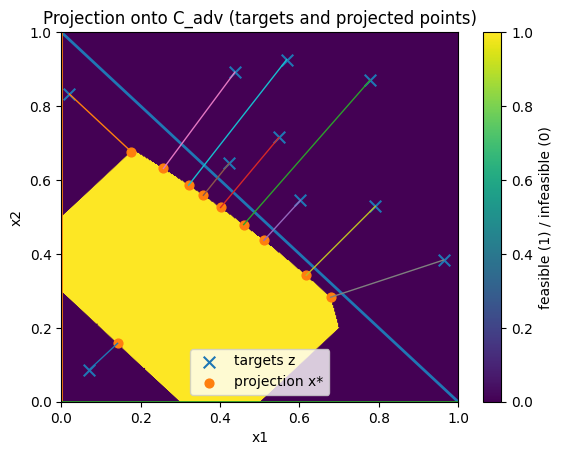

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# ---- Parameters ----
R_risk = np.array([[0.25, 0.10],
                   [0.10, 0.30]])
x0 = np.array([0.4, 0.4])
sigma_max = 0.25
tau_max   = 0.5
beta = 3.0
Cmax = 10.0

# ---- Grid (for plotting C_adv) ----
def generate_grid(n=401):
    x1 = np.linspace(0, 1, n)
    x2 = np.linspace(0, 1, n)
    X1, X2 = np.meshgrid(x1, x2)
    return x1, x2, X1, X2

x1, x2, X1, X2 = generate_grid(401)

mask_P = (X1 >= 0) & (X2 >= 0) & (X1 + X2 <= 1)

Rx1 = R_risk[0, 0] * X1 + R_risk[0, 1] * X2
Rx2 = R_risk[1, 0] * X1 + R_risk[1, 1] * X2
mask_risk = np.sqrt(Rx1**2 + Rx2**2) <= sigma_max

mask_turnover = (np.abs(X1 - x0[0]) + np.abs(X2 - x0[1]) <= tau_max)

mask_exposure = (np.exp(beta * X1) + np.exp(beta * X2) <= Cmax)

mask_C_adv = mask_P & mask_risk & mask_turnover & mask_exposure

# ---- Projection solver (SCS) ----
def project_onto_C_adv(z):
    x = cp.Variable(2)
    constraints = [
        x[0] >= 0,
        x[1] >= 0,
        x[0] + x[1] <= 1,
        cp.norm(R_risk @ x, 2) <= sigma_max,
        cp.norm(x - x0, 1) <= tau_max,
        cp.log_sum_exp(beta * x) <= np.log(Cmax),
    ]
    prob = cp.Problem(cp.Minimize(0.5 * cp.sum_squares(x - z)), constraints)
    prob.solve(solver=cp.SCS, verbose=False)
    return x.value, prob.status, prob.value

# Generate random targets
np.random.seed(0)
Z = np.random.rand(10, 2)

Xstar = np.zeros_like(Z)
dist2 = np.zeros(len(Z), dtype=float)
statuses = []

for k in range(len(Z)):
    xs, st, val = project_onto_C_adv(Z[k])
    statuses.append(st)
    Xstar[k] = xs
    dist2[k] = np.sum((xs - Z[k])**2)

# Print table
print("k | status     | z1       z2       | x1*      x2*      | ||x*-z||^2")
print("--+------------+--------------------+-------------------+-----------")
for k in range(len(Z)):
    print(f"{k:1d} | {statuses[k]:10s} | "
          f"{Z[k,0]:.6f} {Z[k,1]:.6f} | "
          f"{Xstar[k,0]:.6f} {Xstar[k,1]:.6f} | "
          f"{dist2[k]:.6f}")

# Plot C_adv and projections
plt.figure()
plt.imshow(mask_C_adv.astype(float),
           origin="lower",
           extent=[0, 1, 0, 1],
           aspect="auto")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Projection onto C_adv (targets and projected points)")
plt.colorbar(label="feasible (1) / infeasible (0)")

# overlay simplex boundary x1+x2=1
xx = np.linspace(0, 1, 400)
plt.plot(xx, 1 - xx, linewidth=2)
plt.plot([0, 0], [0, 1], linewidth=2)
plt.plot([0, 1], [0, 0], linewidth=2)

# plot points and segments
plt.scatter(Z[:, 0], Z[:, 1], marker="x", s=70, label="targets z")
plt.scatter(Xstar[:, 0], Xstar[:, 1], marker="o", s=40, label="projection x*")
for k in range(len(Z)):
    plt.plot([Z[k, 0], Xstar[k, 0]], [Z[k, 1], Xstar[k, 1]], linewidth=1)

plt.legend()
plt.show()


## Problem 1(f) — Feasibility under tightened budgets (infeasibility demonstration)

So far, we used the original budgets $(\sigma_{\max},\tau_{\max})$ and obtained a nonempty feasible set $C_{\mathrm{adv}}$.

In this part, we **tighten** the risk and turnover budgets (make them smaller). Geometrically:
- the risk constraint shrinks its feasible region,
- the turnover constraint shrinks its feasible region around the current portfolio $x_0$,
- therefore the intersection set $C_{\mathrm{adv}}$ becomes smaller and may eventually become **empty**.

To demonstrate infeasibility, we choose tighter values (for example):
- a moderate tightening where $C_{\mathrm{adv}}$ is still nonempty but smaller,
- and a stronger tightening where the intersection becomes empty.

We verify infeasibility in two ways:
1. By plotting the new intersection mask (grid-based approximation),
2. By solving the projection problem and checking the solver status returned by CVXPY.
If the set is empty, CVXPY reports `infeasible`.


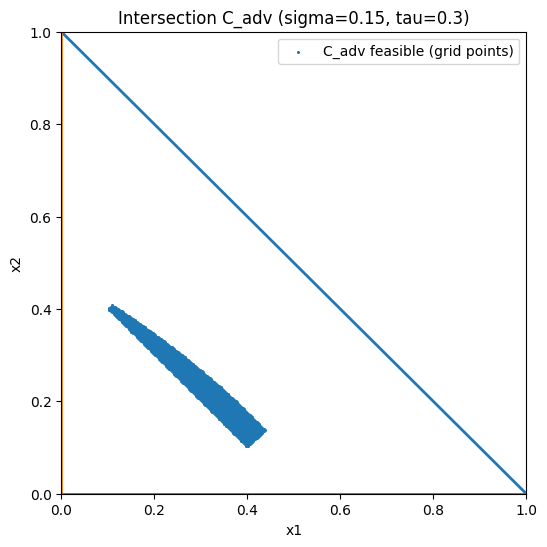

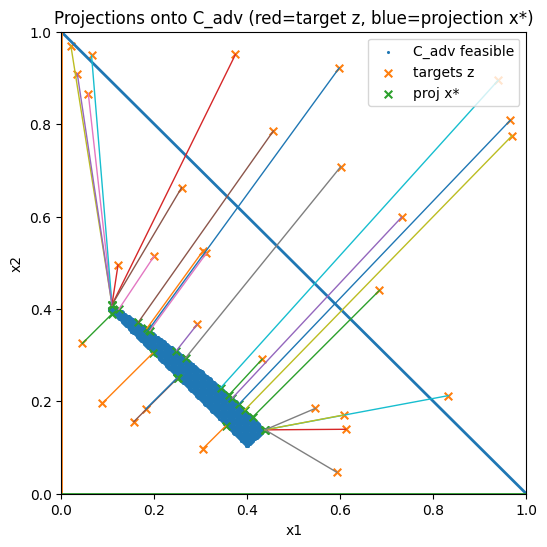

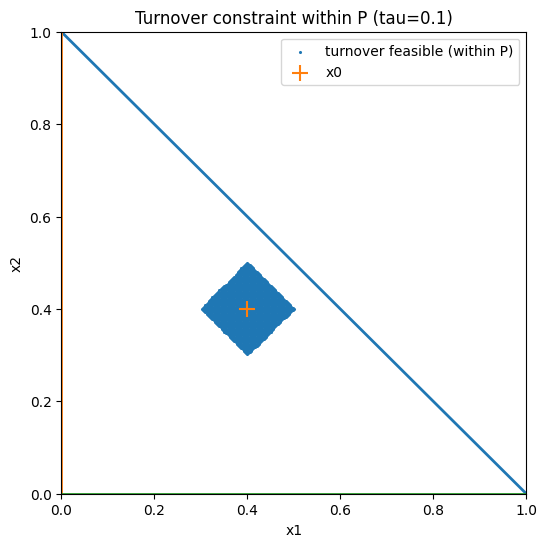

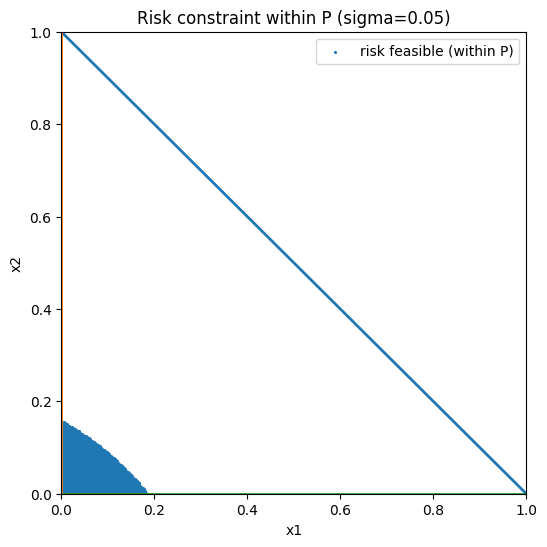

Feasibility check status (sigma=0.05, tau=0.1): infeasible


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# ----- Base parameters -----
R_risk = np.array([[0.25, 0.10],
                   [0.10, 0.30]])
x0 = np.array([0.4, 0.4])
beta = 3.0
Cmax = 10.0

def generate_grid(n=401):
    x1 = np.linspace(0, 1, n)
    x2 = np.linspace(0, 1, n)
    X1, X2 = np.meshgrid(x1, x2)
    return x1, x2, X1, X2

def masks_for_budgets(sigma_max, tau_max, n=401):
    x1, x2, X1, X2 = generate_grid(n)

    mask_P = (X1 >= 0) & (X2 >= 0) & (X1 + X2 <= 1)

    Rx1 = R_risk[0, 0]*X1 + R_risk[0, 1]*X2
    Rx2 = R_risk[1, 0]*X1 + R_risk[1, 1]*X2
    mask_risk = (np.sqrt(Rx1**2 + Rx2**2) <= sigma_max)

    mask_turn = (np.abs(X1 - x0[0]) + np.abs(X2 - x0[1]) <= tau_max)

    mask_expo = (np.exp(beta*X1) + np.exp(beta*X2) <= Cmax)

    mask_C = mask_P & mask_risk & mask_turn & mask_expo
    return x1, x2, X1, X2, mask_P, mask_risk, mask_turn, mask_expo, mask_C

def scatter_mask(ax, X1, X2, mask, label=None, marker='.', s=6):
    xs = X1[mask]
    ys = X2[mask]
    ax.scatter(xs, ys, marker=marker, s=s, label=label)

def plot_simplex_boundary(ax):
    xx = np.linspace(0, 1, 400)
    ax.plot(xx, 1-xx, linewidth=2)
    ax.plot([0,0],[0,1], linewidth=2)
    ax.plot([0,1],[0,0], linewidth=2)
    ax.set_xlim(0,1); ax.set_ylim(0,1)
    ax.set_xlabel("x1"); ax.set_ylabel("x2")

def project_onto_C_adv(z, sigma_max, tau_max):
    x = cp.Variable(2)
    constraints = [
        x[0] >= 0,
        x[1] >= 0,
        x[0] + x[1] <= 1,
        cp.norm(R_risk @ x, 2) <= sigma_max,
        cp.norm1(x - x0) <= tau_max,
        cp.log_sum_exp(beta * x) <= np.log(Cmax),
    ]
    prob = cp.Problem(cp.Minimize(0.5 * cp.sum_squares(x - z)), constraints)
    prob.solve(solver=cp.SCS, verbose=False)
    return x.value, prob.status

# ============================================================
# Case A: tighten to sigma=0.15, tau=0.3  (like the sample)
# ============================================================
sigma1, tau1 = 0.15, 0.3
x1, x2, X1, X2, mask_P, mask_risk, mask_turn, mask_expo, mask_C = masks_for_budgets(sigma1, tau1)

fig, ax = plt.subplots(figsize=(6,6))
plot_simplex_boundary(ax)
scatter_mask(ax, X1, X2, mask_C, label="C_adv feasible (grid points)", marker='.', s=6)
ax.set_title(f"Intersection C_adv (sigma={sigma1}, tau={tau1})")
ax.legend()
plt.show()

# ============================================================
# Projection plot on that tightened set (similar to sample)
# ============================================================
rng = np.random.RandomState(42)
Z = rng.rand(30, 2)   # same style as professor's script (30 points)

Xstar = []
statuses = []
for z in Z:
    xs, st = project_onto_C_adv(z, sigma1, tau1)
    Xstar.append(xs)
    statuses.append(st)
Xstar = np.array(Xstar)

fig, ax = plt.subplots(figsize=(6,6))
plot_simplex_boundary(ax)
scatter_mask(ax, X1, X2, mask_C, label="C_adv feasible", marker='.', s=6)

# targets: red x, projections: blue x (like sample idea)
ax.scatter(Z[:,0], Z[:,1], marker='x', s=30, label="targets z")
ax.scatter(Xstar[:,0], Xstar[:,1], marker='x', s=30, label="proj x*")

for k in range(len(Z)):
    ax.plot([Z[k,0], Xstar[k,0]], [Z[k,1], Xstar[k,1]], linewidth=1)

ax.set_title("Projections onto C_adv (red=target z, blue=projection x*)")
ax.legend()
plt.show()

# ============================================================
# Case B: tighten more to sigma=0.05, tau=0.1 (like the sample)
# Plot turnover and risk separately (inside simplex)
# ============================================================
sigma2, tau2 = 0.05, 0.1
x1, x2, X1, X2, mask_P, mask_risk2, mask_turn2, mask_expo2, mask_C2 = masks_for_budgets(sigma2, tau2)

# Turnover region (inside simplex)
fig, ax = plt.subplots(figsize=(6,6))
plot_simplex_boundary(ax)
scatter_mask(ax, X1, X2, mask_P & mask_turn2, label="turnover feasible (within P)", marker='.', s=6)
ax.scatter([x0[0]],[x0[1]], marker='+', s=120, label="x0")
ax.set_title(f"Turnover constraint within P (tau={tau2})")
ax.legend()
plt.show()

# Risk region (inside simplex)
fig, ax = plt.subplots(figsize=(6,6))
plot_simplex_boundary(ax)
scatter_mask(ax, X1, X2, mask_P & mask_risk2, label="risk feasible (within P)", marker='.', s=6)
ax.set_title(f"Risk constraint within P (sigma={sigma2})")
ax.legend()
plt.show()

# Check infeasibility by solving a feasibility problem (no objective)
x = cp.Variable(2)
feas_constraints = [
    x[0] >= 0, x[1] >= 0, x[0] + x[1] <= 1,
    cp.norm(R_risk @ x, 2) <= sigma2,
    cp.norm1(x - x0) <= tau2,
    cp.log_sum_exp(beta * x) <= np.log(Cmax),
]
prob = cp.Problem(cp.Minimize(0), feas_constraints)
prob.solve(solver=cp.SCS, verbose=False)
print("Feasibility check status (sigma=0.05, tau=0.1):", prob.status)


## Problem 2(a) — Least Squares (L2) line fitting

In this part, we fit a straight line to the data points $(t_i, y_i)$ using the **least squares** criterion.
We assume the model

$$
\hat{y}(t) = a t + b,
$$

and choose $(a,b)$ to minimize the sum of squared residuals:

$$
\min_{a,b}\ \sum_{i=0}^{9}\left(a t_i + b - y_i\right)^2.
$$

This is a convex quadratic optimization problem (and also a standard linear regression problem).  
After computing the optimal $(a,b)$, we plot the data and the fitted line, and we also compute the residuals
$e_i = a t_i + b - y_i$.


Least Squares solution:
a_ls = 0.5212121014174297
b_ls = 2.4345453906842662
max |residual| = 5.083030100606274  at index i = 7  point (t,y) = (np.int64(7), np.float64(1.0))


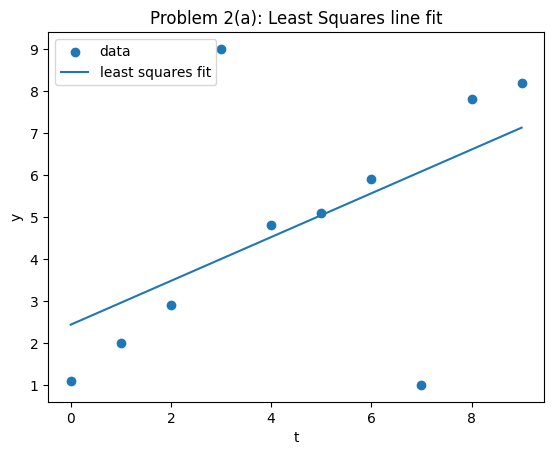

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Data
t = np.arange(10)
y = np.array([1.1, 2.0, 2.9, 9.0, 4.8, 5.1, 5.9, 1.0, 7.8, 8.2])

# Variables
a = cp.Variable()
b = cp.Variable()

# Least squares objective
residuals = a * t + b - y
prob = cp.Problem(cp.Minimize(cp.sum_squares(residuals)))
prob.solve(solver=cp.SCS, verbose=False)  # SCS works well on your setup

a_ls = float(a.value)
b_ls = float(b.value)

# Residuals and summary
e_ls = a_ls * t + b_ls - y
max_abs_idx = int(np.argmax(np.abs(e_ls)))

print("Least Squares solution:")
print("a_ls =", a_ls)
print("b_ls =", b_ls)
print("max |residual| =", np.max(np.abs(e_ls)), " at index i =", max_abs_idx, " point (t,y) =", (t[max_abs_idx], y[max_abs_idx]))

# Plot data and fitted line
tt = np.linspace(0, 9, 200)
y_fit = a_ls * tt + b_ls

plt.figure()
plt.scatter(t, y, label="data")
plt.plot(tt, y_fit, label="least squares fit")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Problem 2(a): Least Squares line fit")
plt.legend()
plt.show()


## Problem 2(b) — Minimax (L∞) fitting and the epigraph form

We consider the robust line fitting problem
$$
\min_{a,b}\ \max_i |a t_i + b - y_i|.
$$

### Why the epigraph formulation is equivalent
Introduce an epigraph variable $\tau$ and solve
$$
\min_{a,b,\tau}\ \tau
\quad \text{s.t.}\quad
|a t_i + b - y_i| \le \tau,\ \forall i.
$$
For any fixed $(a,b)$, the smallest $\tau$ that satisfies all constraints is exactly
$$
\tau = \max_i |a t_i + b - y_i|.
$$
Therefore, minimizing $\tau$ is **equivalent** to minimizing the maximum absolute residual, and the optimal value $\tau^\star$ equals the minimax objective value.

### Why the problem is convex and DCP-compatible
- Each residual $r_i(a,b) = a t_i + b - y_i$ is affine in $(a,b)$.
- The absolute value $|r_i|$ is a convex function of $(a,b)$.
- The constraint $|r_i| \le \tau$ can be written as two affine inequalities:
$$
r_i \le \tau,\qquad -r_i \le \tau,\qquad \forall i,
$$
which is convex and DCP-valid.
- The objective $\min \tau$ is linear (convex).

Hence the epigraph problem is a convex optimization problem and can be modeled directly in CVXPY using linear inequalities (or equivalently using `abs` and `max`).


Minimax (L_infinity) solution via epigraph:
a_inf = -0.014285740426377352
b_inf = 5.071428686126794
tau*  = 3.971428507560112
max |residual| (check) = 3.9714286861267936


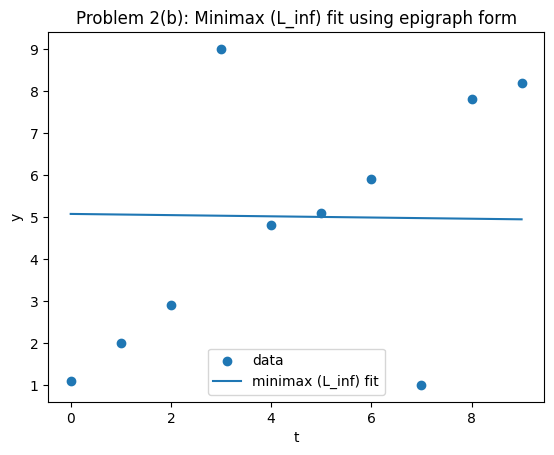

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Data
t = np.arange(10)
y = np.array([1.1, 2.0, 2.9, 9.0, 4.8, 5.1, 5.9, 1.0, 7.8, 8.2])

# Variables
a = cp.Variable()
b = cp.Variable()
tau = cp.Variable(nonneg=True)

# Epigraph constraints: |a t_i + b - y_i| <= tau  for all i
constraints = []
for i in range(len(t)):
    r_i = a * t[i] + b - y[i]
    constraints += [r_i <= tau, -r_i <= tau]

# Solve minimax problem
prob = cp.Problem(cp.Minimize(tau), constraints)
prob.solve(solver=cp.SCS, verbose=False)

a_inf = float(a.value)
b_inf = float(b.value)
tau_star = float(tau.value)

# Residuals
e_inf = a_inf * t + b_inf - y

print("Minimax (L_infinity) solution via epigraph:")
print("a_inf =", a_inf)
print("b_inf =", b_inf)
print("tau*  =", tau_star)
print("max |residual| (check) =", np.max(np.abs(e_inf)))

# Plot data + minimax line
tt = np.linspace(0, 9, 200)
y_fit_inf = a_inf * tt + b_inf

plt.figure()
plt.scatter(t, y, label="data")
plt.plot(tt, y_fit_inf, label="minimax (L_inf) fit")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Problem 2(b): Minimax (L_inf) fit using epigraph form")
plt.legend()
plt.show()


## Problem 2(c) — Solving the minimax problem in two equivalent ways (and comparing results)

In part (b), we solved the minimax ($L_\infty$) fitting problem using an epigraph variable $\tau$ and linear inequalities.

In this part, we solve the same problem using CVXPY's direct expression of the objective:

$$
\min_{a,b}\ \max_i |a t_i + b - y_i|.
$$

CVXPY provides the convex atoms `abs(.)` and `max(.)`, so we can write the objective as:
- `cp.max(cp.abs(a*t + b - y))`

This formulation is DCP-valid because:
- $a t + b - y$ is affine in $(a,b)$,
- `abs` is convex and applied to an affine expression,
- `max` is convex and applied to a vector of convex expressions.

Finally, we compare the solutions from:
1. the epigraph formulation (part b),
2. the direct `max(abs(.))` formulation,
and verify that they produce (numerically) the same optimal line and the same maximum absolute residual.


Method 1 (epigraph):
  a = -0.014285740426377352
  b = 5.071428686126794
  tau* = 3.971428507560112
  max|res| (check) = 3.9714286861267936

Method 2 (direct max(abs)):
  a = -0.014274519399229286
  b = 5.0714161971408025
  max|res| = 3.971494561346198

Differences (absolute):
  |a_epi - a_dir| = 1.122102714806554e-05
  |b_epi - b_dir| = 1.2488985991154777e-05
  |tau* - max|res|_dir| = 6.605378608570689e-05


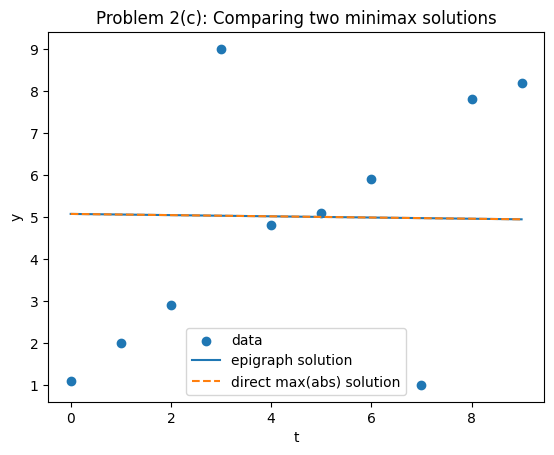

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Data
t = np.arange(10)
y = np.array([1.1, 2.0, 2.9, 9.0, 4.8, 5.1, 5.9, 1.0, 7.8, 8.2])

# -----------------------------
# Method 1: Epigraph formulation
# -----------------------------
a1 = cp.Variable()
b1 = cp.Variable()
tau = cp.Variable(nonneg=True)

constraints = []
for i in range(len(t)):
    r_i = a1 * t[i] + b1 - y[i]
    constraints += [r_i <= tau, -r_i <= tau]

prob1 = cp.Problem(cp.Minimize(tau), constraints)
prob1.solve(solver=cp.SCS, verbose=False)

a_epi = float(a1.value)
b_epi = float(b1.value)
tau_star = float(tau.value)

e_epi = a_epi * t + b_epi - y
max_abs_epi = float(np.max(np.abs(e_epi)))

# ---------------------------------------
# Method 2: Direct objective max(abs(.))
# ---------------------------------------
a2 = cp.Variable()
b2 = cp.Variable()

res2 = a2 * t + b2 - y
prob2 = cp.Problem(cp.Minimize(cp.max(cp.abs(res2))))
prob2.solve(solver=cp.SCS, verbose=False)

a_dir = float(a2.value)
b_dir = float(b2.value)

e_dir = a_dir * t + b_dir - y
max_abs_dir = float(np.max(np.abs(e_dir)))

# -----------------------------
# Compare results
# -----------------------------
print("Method 1 (epigraph):")
print("  a =", a_epi)
print("  b =", b_epi)
print("  tau* =", tau_star)
print("  max|res| (check) =", max_abs_epi)

print("\nMethod 2 (direct max(abs)):")
print("  a =", a_dir)
print("  b =", b_dir)
print("  max|res| =", max_abs_dir)

print("\nDifferences (absolute):")
print("  |a_epi - a_dir| =", abs(a_epi - a_dir))
print("  |b_epi - b_dir| =", abs(b_epi - b_dir))
print("  |tau* - max|res|_dir| =", abs(tau_star - max_abs_dir))

# Optional: plot both lines on the same figure
tt = np.linspace(0, 9, 200)
y_epi = a_epi * tt + b_epi
y_dir = a_dir * tt + b_dir

plt.figure()
plt.scatter(t, y, label="data")
plt.plot(tt, y_epi, label="epigraph solution")
plt.plot(tt, y_dir, linestyle="--", label="direct max(abs) solution")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Problem 2(c): Comparing two minimax solutions")
plt.legend()
plt.show()


## Problem 2(d) — Detailed comparison: L2 (least squares) vs. L∞ (minimax)

Let the residuals be
$$
e_i = a t_i + b - y_i.
$$
We compare two criteria:

- **Least Squares (L2):**
$$
\min_{a,b}\ \sum_i e_i^2.
$$

- **Minimax / Chebyshev fit (L∞):**
$$
\min_{a,b}\ \max_i |e_i|.
$$

### 1) Why least squares can be strongly affected by outliers
In least squares, residuals are **squared**. Therefore, a single large residual contributes disproportionately:
$$
(10)^2 = 100 \quad \text{while} \quad (2)^2 = 4.
$$
So if a few points behave like outliers (unusually far from the general trend), the optimizer can significantly change the line to reduce those large errors, even if that slightly increases the errors of many other points.  
This is why the L2 fitted line may be “pulled” toward outlier points.

### 2) How minimax tries to balance the worst error across all points
The minimax objective only cares about the **largest absolute residual**:
$$
\|e\|_\infty = \max_i |e_i|.
$$
So it tries to reduce the worst deviation and typically produces a line such that several points become **active**, meaning their residuals are close to the optimal bound:
$$
e_i \approx +\tau^\star \quad \text{or} \quad e_i \approx -\tau^\star.
$$
Geometrically, minimax finds the *narrowest vertical band* of half-width $\tau^\star$ that can contain all data points around the line.  
As a result, the line is often less dominated by a small number of outliers and creates a more “uniform” error distribution across the data.

### 3) Numerical comparison required by the problem statement
To highlight the practical difference, we compare:
$$
\max_i |e_i^{LS}| \quad \text{vs.} \quad \max_i |e_i^{\infty}|.
$$
We expect the minimax solution to **significantly reduce** the maximum absolute error:
$$
\max_i |e_i^{\infty}| \le \max_i |e_i^{LS}|.
$$
However, because the objectives are different, it is also possible that the minimax fit has a **larger** sum of squared errors:
$$
\sum_i (e_i^{\infty})^2 \ge \sum_i (e_i^{LS})^2,
$$
since minimax does not optimize the squared-error criterion.

### Conclusion
- L2 is optimal for minimizing total squared error but can be sensitive to outliers.
- L∞ is optimal for minimizing the worst-case error and tends to “spread” the error more evenly, often improving robustness.


=== Problem 2(d): Numerical comparison ===

Least Squares (L2) fit:
  a = 0.5212121014
  b = 2.4345453907
  max_i |e_i^LS|  = 5.0830301006
  sum_i (e_i^LS)^2 = 56.6638787879
  worst residual index i = 7, point (t_i, y_i)=(7, 1.0)
  e_i^LS at worst point  = 5.0830301006

Minimax (L_infinity) fit:
  a = -0.0142745194
  b = 5.0714161971
  max_i |e_i^inf| = 3.9714945613
  sum_i (e_i^inf)^2 = 80.8365304562
  worst residual index i = 7, point (t_i, y_i)=(7, 1.0)
  e_i^inf at worst point = 3.9714945613

Expected relationship:
  max_i |e_i^inf| <= max_i |e_i^LS|  (minimax minimizes worst-case error)

i | t | y   | e_LS       | |e_LS|    | e_inf      | |e_inf|
--+---+-----+------------+----------+------------+----------
0 | 0 |  1.1 |  1.33454539 | 1.33454539 |  3.97141620 | 3.97141620
1 | 1 |  2.0 |  0.95575749 | 0.95575749 |  3.05714168 | 3.05714168
2 | 2 |  2.9 |  0.57696959 | 0.57696959 |  2.14286716 | 2.14286716
3 | 3 |  9.0 | -5.00181831 | 5.00181831 | -3.97140736 | 3.97140736
4 | 4 |  4.

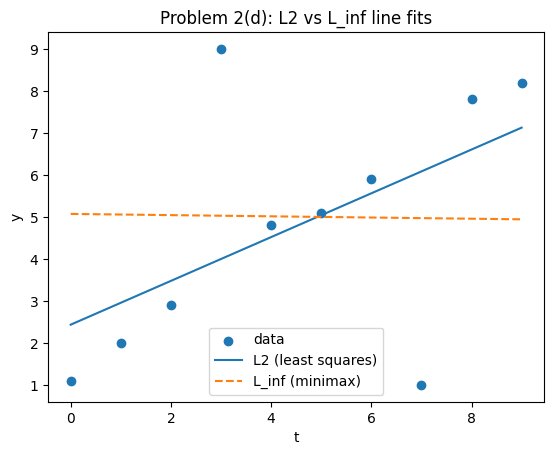

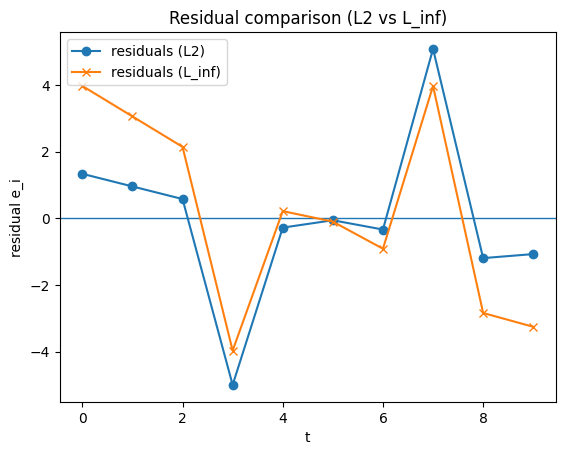

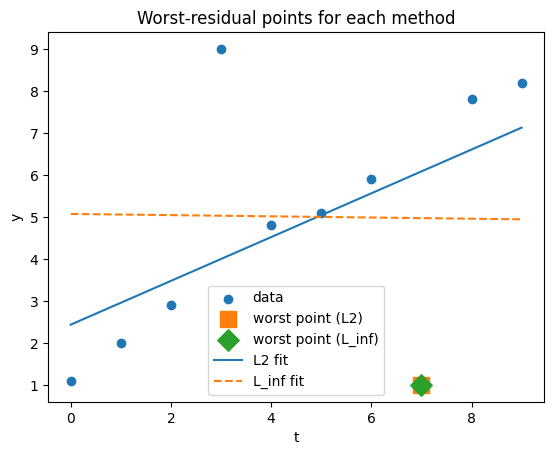

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Data
t = np.arange(10)
y = np.array([1.1, 2.0, 2.9, 9.0, 4.8, 5.1, 5.9, 1.0, 7.8, 8.2])

# -----------------------
# Least Squares (L2)
# -----------------------
a_ls_var = cp.Variable()
b_ls_var = cp.Variable()
res_ls_expr = a_ls_var * t + b_ls_var - y

prob_ls = cp.Problem(cp.Minimize(cp.sum_squares(res_ls_expr)))
prob_ls.solve(solver=cp.SCS, verbose=False)

a_ls = float(a_ls_var.value)
b_ls = float(b_ls_var.value)
e_ls = a_ls * t + b_ls - y

max_abs_ls = float(np.max(np.abs(e_ls)))
ssq_ls = float(np.sum(e_ls**2))
idx_ls = int(np.argmax(np.abs(e_ls)))

# -----------------------
# Minimax (L_infinity)
# -----------------------
a_inf_var = cp.Variable()
b_inf_var = cp.Variable()
res_inf_expr = a_inf_var * t + b_inf_var - y

prob_inf = cp.Problem(cp.Minimize(cp.max(cp.abs(res_inf_expr))))
prob_inf.solve(solver=cp.SCS, verbose=False)

a_inf = float(a_inf_var.value)
b_inf = float(b_inf_var.value)
e_inf = a_inf * t + b_inf - y

max_abs_inf = float(np.max(np.abs(e_inf)))
ssq_inf = float(np.sum(e_inf**2))
idx_inf = int(np.argmax(np.abs(e_inf)))

# -----------------------
# Print comparison (as requested)
# -----------------------
print("=== Problem 2(d): Numerical comparison ===\n")

print("Least Squares (L2) fit:")
print(f"  a = {a_ls:.10f}")
print(f"  b = {b_ls:.10f}")
print(f"  max_i |e_i^LS|  = {max_abs_ls:.10f}")
print(f"  sum_i (e_i^LS)^2 = {ssq_ls:.10f}")
print(f"  worst residual index i = {idx_ls}, point (t_i, y_i)=({t[idx_ls]}, {y[idx_ls]})")
print(f"  e_i^LS at worst point  = {e_ls[idx_ls]:.10f}\n")

print("Minimax (L_infinity) fit:")
print(f"  a = {a_inf:.10f}")
print(f"  b = {b_inf:.10f}")
print(f"  max_i |e_i^inf| = {max_abs_inf:.10f}")
print(f"  sum_i (e_i^inf)^2 = {ssq_inf:.10f}")
print(f"  worst residual index i = {idx_inf}, point (t_i, y_i)=({t[idx_inf]}, {y[idx_inf]})")
print(f"  e_i^inf at worst point = {e_inf[idx_inf]:.10f}\n")

print("Expected relationship:")
print("  max_i |e_i^inf| <= max_i |e_i^LS|  (minimax minimizes worst-case error)\n")

# Optional: small residual table
print("i | t | y   | e_LS       | |e_LS|    | e_inf      | |e_inf|")
print("--+---+-----+------------+----------+------------+----------")
for i in range(len(t)):
    print(f"{i:1d} | {t[i]:1d} | {y[i]:4.1f} | {e_ls[i]: .8f} | {abs(e_ls[i]):.8f} | {e_inf[i]: .8f} | {abs(e_inf[i]):.8f}")

# -----------------------
# Plot both fitted lines
# -----------------------
tt = np.linspace(0, 9, 200)
y_ls_fit = a_ls * tt + b_ls
y_inf_fit = a_inf * tt + b_inf

plt.figure()
plt.scatter(t, y, label="data")
plt.plot(tt, y_ls_fit, label="L2 (least squares)")
plt.plot(tt, y_inf_fit, linestyle="--", label="L_inf (minimax)")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Problem 2(d): L2 vs L_inf line fits")
plt.legend()
plt.show()

# -----------------------
# Residual plot
# -----------------------
plt.figure()
plt.axhline(0, linewidth=1)
plt.plot(t, e_ls, marker="o", label="residuals (L2)")
plt.plot(t, e_inf, marker="x", label="residuals (L_inf)")
plt.xlabel("t")
plt.ylabel("residual e_i")
plt.title("Residual comparison (L2 vs L_inf)")
plt.legend()
plt.show()

# -----------------------
# Highlight worst points on the data plot (extra clarity)
# -----------------------
plt.figure()
plt.scatter(t, y, label="data")
plt.scatter([t[idx_ls]], [y[idx_ls]], marker="s", s=120, label="worst point (L2)")
plt.scatter([t[idx_inf]], [y[idx_inf]], marker="D", s=120, label="worst point (L_inf)")
plt.plot(tt, y_ls_fit, label="L2 fit")
plt.plot(tt, y_inf_fit, linestyle="--", label="L_inf fit")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Worst-residual points for each method")
plt.legend()
plt.show()


## Problem 2(e) — Geometric interpretation and optimality structure of the minimax fit

In this part, we interpret the minimax (L∞) solution from a geometric and optimization perspective.

### 1) Vertical band interpretation
The minimax problem
$$
\min_{a,b} \max_i |a t_i + b - y_i|
$$
can be interpreted geometrically as finding the **narrowest vertical band** around a line
$$
y = a t + b
$$
that contains all data points.

If $\tau^\star$ denotes the optimal value, then the optimal line satisfies
$$
-\tau^\star \le a t_i + b - y_i \le \tau^\star \quad \forall i.
$$
Equivalently, all points lie between the two parallel lines:
$$
y = a t + b \pm \tau^\star.
$$

### 2) Active constraints and equioscillation
At the optimal solution, it is typical that **multiple constraints are active**, meaning that for several indices $i$,
$$
|a t_i + b - y_i| = \tau^\star.
$$
These points lie exactly on the upper or lower boundary of the band.

This phenomenon is closely related to the classical **equioscillation property** in Chebyshev approximation:
the optimal minimax fit tends to balance the largest positive and negative deviations instead of concentrating the error on a single point.

### 3) Contrast with least squares
- In least squares (L2), optimality conditions involve averaging effects over all data points.
  Most residuals are nonzero, but there is no explicit notion of an active set.
- In minimax (L∞), the solution is often determined by a **small subset of critical points**
  (those attaining the maximum absolute error).
  Non-active points can move without affecting the optimal objective value as long as they stay strictly inside the band.

### 4) Practical implication
This explains why the minimax solution:
- reduces the worst-case error significantly,
- is more robust to outliers,
- and produces residuals with similar magnitudes (close to $\pm \tau^\star$) at the extreme points.

Such properties make L∞ fitting particularly useful when **guarantees on the maximum error** are more important than average performance.


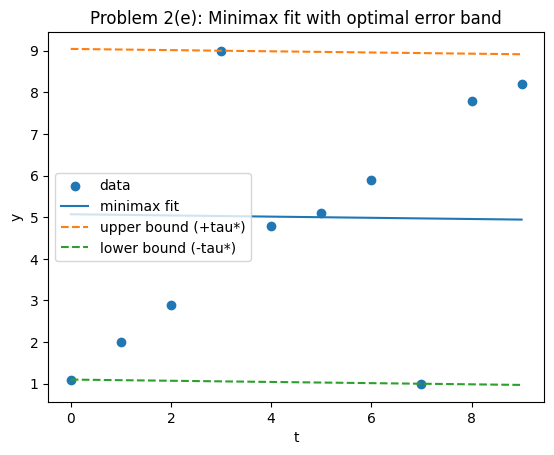

tau* (optimal max absolute residual) = 3.971494561346198


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# Data
t = np.arange(10)
y = np.array([1.1, 2.0, 2.9, 9.0, 4.8, 5.1, 5.9, 1.0, 7.8, 8.2])

# Minimax (L_inf) fit
a = cp.Variable()
b = cp.Variable()
res = a * t + b - y
prob = cp.Problem(cp.Minimize(cp.max(cp.abs(res))))
prob.solve(solver=cp.SCS, verbose=False)

a_inf = float(a.value)
b_inf = float(b.value)
e_inf = a_inf * t + b_inf - y
tau_star = float(np.max(np.abs(e_inf)))

# Plot
tt = np.linspace(0, 9, 200)
y_center = a_inf * tt + b_inf
y_upper = y_center + tau_star
y_lower = y_center - tau_star

plt.figure()
plt.scatter(t, y, label="data")
plt.plot(tt, y_center, label="minimax fit")
plt.plot(tt, y_upper, linestyle="--", label="upper bound (+tau*)")
plt.plot(tt, y_lower, linestyle="--", label="lower bound (-tau*)")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Problem 2(e): Minimax fit with optimal error band")
plt.legend()
plt.show()

print("tau* (optimal max absolute residual) =", tau_star)


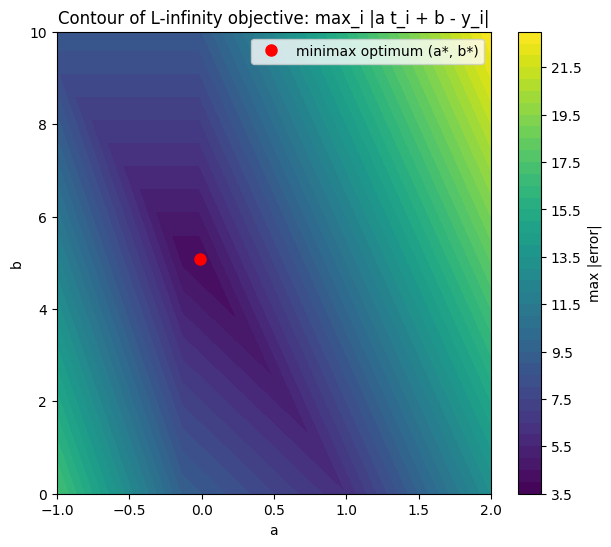

Optimal minimax parameters:
a* = -0.014274519399229286
b* = 5.0714161971408025


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# -----------------------
# Data
# -----------------------
t = np.arange(10)
y = np.array([1.1, 2.0, 2.9, 9.0, 4.8, 5.1, 5.9, 1.0, 7.8, 8.2])

# -----------------------
# Solve minimax to get optimal (a*, b*)
# -----------------------
a_var = cp.Variable()
b_var = cp.Variable()
res = a_var * t + b_var - y
prob = cp.Problem(cp.Minimize(cp.max(cp.abs(res))))
prob.solve(solver=cp.SCS, verbose=False)

a_star = float(a_var.value)
b_star = float(b_var.value)

# -----------------------
# Grid over (a, b)
# -----------------------
a_vals = np.linspace(-1.0, 2.0, 300)
b_vals = np.linspace(0.0, 10.0, 300)
A, B = np.meshgrid(a_vals, b_vals)

# -----------------------
# Compute L-infinity objective on grid
# f(a,b) = max_i |a t_i + b - y_i|
# -----------------------
F = np.zeros_like(A)
for i in range(len(t)):
    F = np.maximum(F, np.abs(A * t[i] + B - y[i]))

# -----------------------
# Contour plot (epigraph visualization)
# -----------------------
plt.figure(figsize=(7,6))
cont = plt.contourf(A, B, F, levels=40, cmap="viridis")
plt.colorbar(cont, label="max |error|")

# Mark optimal point
plt.plot(a_star, b_star, "ro", markersize=8, label="minimax optimum (a*, b*)")

plt.xlabel("a")
plt.ylabel("b")
plt.title("Contour of L-infinity objective: max_i |a t_i + b - y_i|")
plt.legend()
plt.show()

print("Optimal minimax parameters:")
print("a* =", a_star)
print("b* =", b_star)


### Epigraph / contour visualization of the L∞ objective

The figure shows contour lines of the function
$$
f(a,b)=\max_i |a t_i + b - y_i|.
$$
Each contour corresponds to a fixed value of the maximum absolute residual.
The minimax solution $(a^\star, b^\star)$ is located at the point where the smallest possible contour level is attained.


## Problem 3(a) — Data generation

We generate a synthetic least-squares instance with dimensions:
- m = 50, n = 10.

Steps:
1) Set a random seed for reproducibility.
2) Generate A ∈ R^{m×n} with i.i.d. standard normal entries.
3) Generate a “true” vector x_true ∈ R^n.
4) Generate noise ε ∈ R^m with small variance (Gaussian).
5) Form the observation vector b = A x_true + ε.

We will keep A and b fixed for the rest of Problem 3.


In [30]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# --- Problem sizes (as in the statement) ---
m, n = 50, 10

# --- Reproducibility ---
np.random.seed(0)

# --- Generate synthetic LS data ---
A = np.random.randn(m, n)               # i.i.d. N(0,1)
x_true = np.random.randn(n)             # any reasonable true vector
eps = 0.1 * np.random.randn(m)          # small-variance noise (std=0.1)
b = A @ x_true + eps

print("Generated data:")
print("A shape:", A.shape)
print("b shape:", b.shape)
print("||eps||2:", np.linalg.norm(eps))


Generated data:
A shape: (50, 10)
b shape: (50,)
||eps||2: 0.7843530887748594


## Problem 3(b) — Unconstrained least squares

We solve the standard least-squares problem:
$$
\min_{x\in\mathbb{R}^n} \frac{1}{2}\|Ax-b\|_2^2.
$$

Using CVXPY, we compute the optimal solution x_LS and then report:
- ||x_LS||_2
- r_LS = ||A x_LS − b||_2

These reference values are used later to select a meaningful range for ρ.


In [31]:
# Unconstrained LS: min 0.5 ||Ax - b||_2^2
x = cp.Variable(n)
obj = 0.5 * cp.sum_squares(A @ x - b)
prob_ls = cp.Problem(cp.Minimize(obj))
prob_ls.solve(solver=cp.SCS, verbose=False)

x_ls = np.asarray(x.value).reshape(-1)
r_ls = float(np.linalg.norm(A @ x_ls - b))
nx_ls = float(np.linalg.norm(x_ls))

print("Unconstrained LS results:")
print("status:", prob_ls.status)
print("||x_LS||2 =", nx_ls)
print("r_LS = ||A x_LS - b||2 =", r_ls)


Unconstrained LS results:
status: optimal
||x_LS||2 = 3.181408824936637
r_LS = ||A x_LS - b||2 = 0.682092894315868


## Problem 3(c) — L2-norm constrained least squares (parameterized by ρ)

We now consider:
$$
\min_{x\in\mathbb{R}^n} \frac{1}{2}\|Ax-b\|_2^2
\quad\text{s.t.}\quad \|x\|_2 \le \rho,
$$
where ρ > 0 controls how “tight” the norm constraint is.

Implementation requirement (from the statement):
- Define a nonnegative scalar parameter `rho = cp.Parameter(nonneg=True)`.
- Build a single CVXPY `Problem` object once.
- Solve it multiple times later by only updating `rho.value`.


In [32]:
# Parameterized constrained LS: define once, reuse by changing rho.value
rho = cp.Parameter(nonneg=True, name="rho")

x_c = cp.Variable(n, name="x")
objective_c = 0.5 * cp.sum_squares(A @ x_c - b)
constr = [cp.norm(x_c, 2) <= rho]

prob_constr = cp.Problem(cp.Minimize(objective_c), constr)

print("Built parameterized problem once.")
print("Parameter rho is ready. Example: set rho.value and call prob_constr.solve().")


Built parameterized problem once.
Parameter rho is ready. Example: set rho.value and call prob_constr.solve().


## Problem 3(d) — Parametric study and tradeoff curves

We study how the constraint radius ρ affects:
- the residual norm: r(ρ) = ||A x_star(ρ) − b||_2
- the solution norm: n(ρ) = ||x_star(ρ)||_2

Following the statement, we choose:
- ρ_min = 0.1 ||x_LS||_2
- ρ_max = 1.5 ||x_LS||_2
and evaluate the problem on ~20–30 uniformly spaced values of ρ.

What we expect to observe:
- For very small ρ, the constraint is tight, so the optimizer is forced to keep ||x||_2 small and r(ρ) becomes larger.
- As ρ increases, the feasible set expands, so r(ρ) cannot increase (it is non-increasing).
- When ρ is close to (or larger than) ||x_LS||_2, the unconstrained LS solution becomes feasible, so x_star(ρ) approaches x_LS and r(ρ) approaches r_LS.


Sweep finished.
rho range: (0.31814088249366373, 4.772113237404955)
Any non-optimal statuses? False


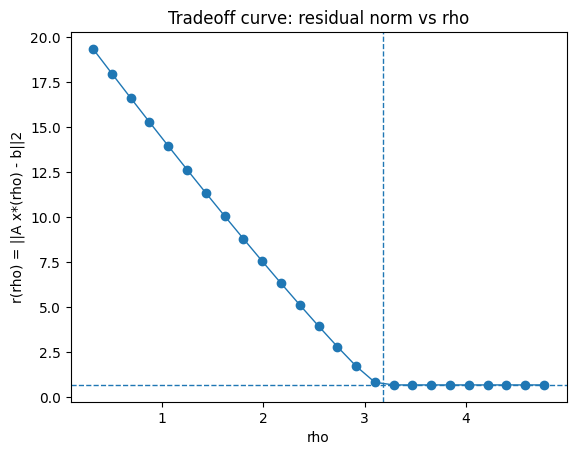

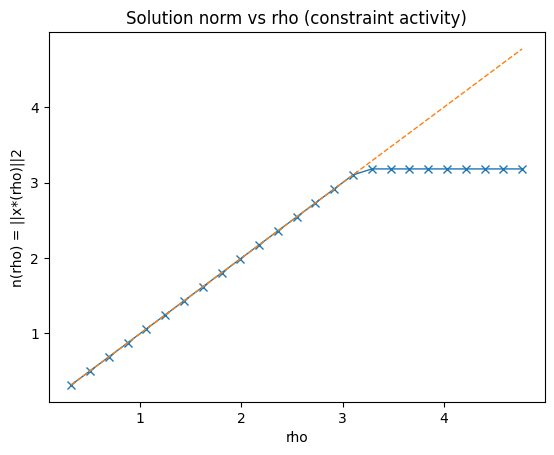

In [33]:
# Build rho grid exactly as suggested
rho_min = 0.1 * nx_ls
rho_max = 1.5 * nx_ls
rho_vals = np.linspace(rho_min, rho_max, 25)

r_list = []
n_list = []
status_list = []
xstar_list = []  # optional: keep solutions if you want

for rv in rho_vals:
    rho.value = rv
    prob_constr.solve(solver=cp.SCS, verbose=False)

    status_list.append(prob_constr.status)

    if prob_constr.status in ["optimal", "optimal_inaccurate"]:
        x_star = np.asarray(x_c.value).reshape(-1)
        xstar_list.append(x_star)
        r_list.append(float(np.linalg.norm(A @ x_star - b)))
        n_list.append(float(np.linalg.norm(x_star)))
    else:
        xstar_list.append(None)
        r_list.append(np.nan)
        n_list.append(np.nan)

r_list = np.array(r_list, dtype=float)
n_list = np.array(n_list, dtype=float)

print("Sweep finished.")
print("rho range:", (rho_min, rho_max))
print("Any non-optimal statuses?", any(s not in ["optimal", "optimal_inaccurate"] for s in status_list))

# Plot r(rho) vs rho
plt.figure()
plt.plot(rho_vals, r_list, marker="o", linewidth=1)
plt.axvline(nx_ls, linestyle="--", linewidth=1)
plt.axhline(r_ls, linestyle="--", linewidth=1)
plt.xlabel("rho")
plt.ylabel("r(rho) = ||A x*(rho) - b||2")
plt.title("Tradeoff curve: residual norm vs rho")
plt.show()

# Plot n(rho) vs rho
plt.figure()
plt.plot(rho_vals, n_list, marker="x", linewidth=1)
plt.plot(rho_vals, rho_vals, linestyle="--", linewidth=1)  # y = rho
plt.xlabel("rho")
plt.ylabel("n(rho) = ||x*(rho)||2")
plt.title("Solution norm vs rho (constraint activity)")
plt.show()


## Effect of the radius ρ on the constrained LS solution (requested explanation)

We study the norm-constrained least-squares problem
$$
x^{\star}(\rho)\in\arg\min_x \frac{1}{2}\|Ax-b\|_2^2
\quad\text{s.t.}\quad \|x\|_2 \le \rho,
$$
and define the optimal residual (data-fit) as
$$
r(\rho) := \|A x^{\star}(\rho) - b\|_2,
\qquad
r_{LS} := \|A x_{LS} - b\|_2,
$$
where $x_{LS}$ is the **unconstrained** least-squares solution.

---

### 1) When ρ is very small: the constraint becomes “tight” and affects r(ρ)

The feasible set of the constrained problem is the Euclidean ball:
$$
\mathcal{B}(\rho)=\{x:\|x\|_2\le\rho\}.
$$
When ρ is small, this ball is small, meaning the optimization is forced to search only among vectors with small norm.  
Geometrically, the algorithm cannot choose a large-norm vector even if that would greatly reduce the residual.

This has two important consequences:

1. **Limited flexibility / poorer fit:**  
   Minimizing $\|Ax-b\|_2$ requires enough degrees of freedom in $x$. If $\|x\|_2$ is forced to be small, the model cannot “move” far in parameter space to match the data well, so the best achievable fit typically worsens. Hence, for small ρ we usually observe a **larger residual**:
   $$
   r(\rho)\ \text{is relatively large when ρ is small.}
   $$

2. **Monotonic behavior with ρ (key fact):**  
   If $\rho_1 < \rho_2$, then $\mathcal{B}(\rho_1)\subseteq \mathcal{B}(\rho_2)$.  
   Minimizing the same objective over a larger feasible set cannot make the optimum worse, therefore
   $$
   r(\rho)\ \text{is a non-increasing function of ρ.}
   $$
   So tightening the constraint (decreasing ρ) can only keep the residual the same or increase it.

In many instances (including ours), when ρ is small the constraint becomes **active**, meaning the optimizer ends up near the boundary:
$$
\|x^{\star}(\rho)\|_2 \approx \rho,
$$
because the best way to reduce the residual under a tight norm limit is to use as much of the available “budget” as possible.

---

### 2) When ρ increases and approaches ||x_LS||₂: why x*(ρ) → x_LS and r(ρ) → r_LS

The unconstrained least-squares solution $x_{LS}$ is defined by
$$
x_{LS}\in\arg\min_x \frac{1}{2}\|Ax-b\|_2^2.
$$
Now consider what happens when ρ becomes large.

- If
  $$
  \rho \ge \|x_{LS}\|_2,
  $$
  then $x_{LS}$ satisfies the constraint $\|x\|_2\le \rho$, i.e., **$x_{LS}$ becomes feasible** for the constrained problem.

- Since $x_{LS}$ already minimizes the objective over *all* $x$, it must also minimize the objective over the smaller feasible set $\mathcal{B}(\rho)$ (because the constrained problem is just the same objective but with fewer admissible points). Therefore, once $x_{LS}$ is feasible, the constrained optimizer cannot do better than $x_{LS}$ and must coincide with it:
  $$
  x^{\star}(\rho) = x_{LS}\qquad \text{for all }\rho \ge \|x_{LS}\|_2.
  $$

- Consequently, the optimal residual also matches the unconstrained residual:
  $$
  r(\rho)=\|A x^{\star}(\rho)-b\|_2=\|A x_{LS}-b\|_2 = r_{LS},
  \qquad \rho \ge \|x_{LS}\|_2.
  $$

**Interpretation:**  
As ρ increases, the constraint gradually stops restricting the optimizer.  
Near the threshold $\rho \approx \|x_{LS}\|_2$, the solution transitions from a boundary-limited regime (active constraint) to the unconstrained regime (inactive constraint). Practically, this is seen as:
- $x^{\star}(\rho)$ approaching $x_{LS}$,
- $r(\rho)$ decreasing and then flattening near $r_{LS}$ (no further improvement is possible because we already reached the global unconstrained optimum).

---

### Summary (one sentence)
Small ρ makes the feasible set small and typically increases the best achievable residual, while large ρ (at least $\|x_{LS}\|_2$) makes the constraint inactive so the constrained solution equals the unconstrained LS solution and $r(\rho)$ equals $r_{LS}$.


## Problem 3(e) — Value function and connection to regularization

Define the value function:
$$
v(\rho) = \min_{\|x\|_2 \le \rho}\ \frac{1}{2}\|Ax-b\|_2^2.
$$

From part (d), we already computed:
$$
r(\rho) = \|A x^\star(\rho) - b\|_2.
$$
Therefore,
$$
v(\rho) = \frac{1}{2} r(\rho)^2.
$$

### Why v(ρ) is non-increasing
When ρ increases, the feasible set {x : ||x||_2 ≤ ρ} becomes larger.
Minimizing the same objective over a larger set cannot produce a larger optimal value.
Hence v(ρ) is non-increasing (at least “non-increasing up to numerical error”).

### Connection to ridge-type regularization (intuition)
The constrained formulation limits the size of x, which discourages large coefficients.
This is closely related (in spirit) to ridge regularization:
$$
\min_x\ \frac{1}{2}\|Ax-b\|_2^2 + \lambda \|x\|_2^2,
$$
where λ controls the strength of penalizing large ||x||_2.
Although we do not need to prove exact equivalence here, both approaches express the same tradeoff:
better fit vs. smaller model norm.


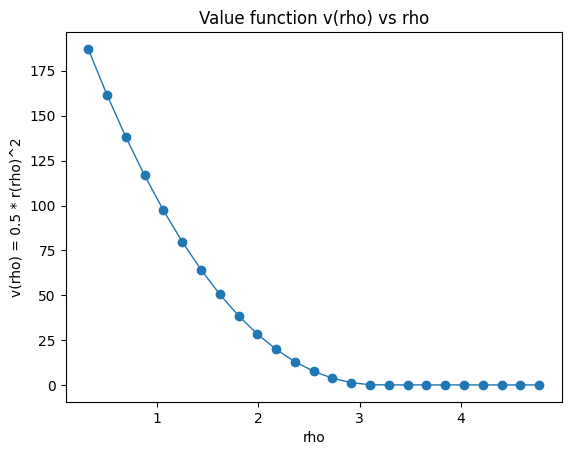

Max positive increase in v(rho) across grid (numerical): 3.608224830031759e-16


In [34]:
# Compute and plot value function v(rho) = 0.5 * r(rho)^2
v_list = 0.5 * (r_list ** 2)

plt.figure()
plt.plot(rho_vals, v_list, marker="o", linewidth=1)
plt.xlabel("rho")
plt.ylabel("v(rho) = 0.5 * r(rho)^2")
plt.title("Value function v(rho) vs rho")
plt.show()

# Quick numeric sanity: check non-increasing trend (allow tiny numerical noise)
diffs = np.diff(v_list)
print("Max positive increase in v(rho) across grid (numerical):", np.max(diffs))


## Problem 3(f) — Dual variable λ(ρ) and sensitivity (“shadow price”) interpretation

Consider the constrained least-squares problem:
$$
\min_x \ \frac{1}{2}\|Ax-b\|_2^2
\quad\text{s.t.}\quad \|x\|_2 \le \rho.
$$

Let the optimal value (value function) be
$$
v(\rho)=\min_{\|x\|_2\le\rho}\ \frac{1}{2}\|Ax-b\|_2^2.
$$

### 1) What is λ(ρ)?
In the KKT conditions, a nonnegative Lagrange multiplier (dual variable) λ is associated with the norm constraint:
$$
\lambda(\rho)\ge 0.
$$
In CVXPY, this λ(ρ) is exactly what we obtain from the constraint’s `.dual_value`.

### 2) Active/inactive constraint interpretation
- If the constraint is **inactive** (the solution lies strictly inside the ball), then λ(ρ) should be (approximately) zero:
  $$
  \|x^{\star}(\rho)\|_2 < \rho \quad \Rightarrow \quad \lambda(\rho)\approx 0.
  $$
- If the constraint is **active** (solution on the boundary), then λ(ρ) is typically positive:
  $$
  \|x^{\star}(\rho)\|_2 = \rho \quad \Rightarrow \quad \lambda(\rho) > 0.
  $$

So λ(ρ) detects whether the constraint is binding and how “costly” it is.

### 3) Sensitivity / shadow price meaning
Because ρ appears in the constraint as $\|x\|_2 - \rho \le 0$, the Lagrangian includes
$$
\lambda(\|x\|_2 - \rho).
$$
Under standard regularity conditions (which hold here), the dual variable describes how the optimal value changes with ρ:
$$
\frac{d}{d\rho} v(\rho) = -\lambda(\rho).
$$

Therefore:
- If λ(ρ) is large, a small increase in ρ can significantly decrease the optimal objective value.
- If λ(ρ) is near zero, increasing ρ gives almost no improvement (we are already close to the unconstrained LS regime).

Numerically, we can check this relationship by comparing λ(ρ) with a finite-difference estimate of $-v'(\rho)$.


Reference (unconstrained LS):
  ||x_LS||2 = 3.181409
  r_LS      = 0.682093


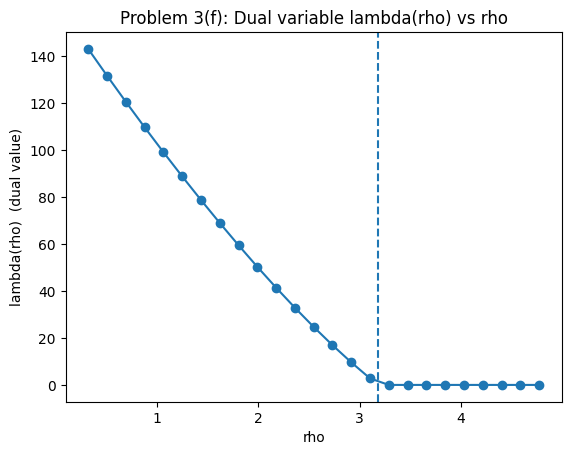

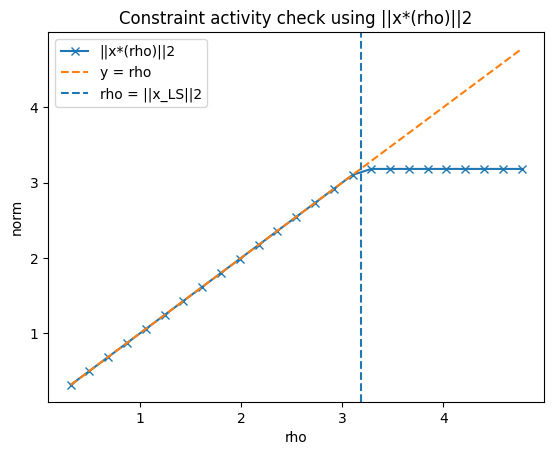

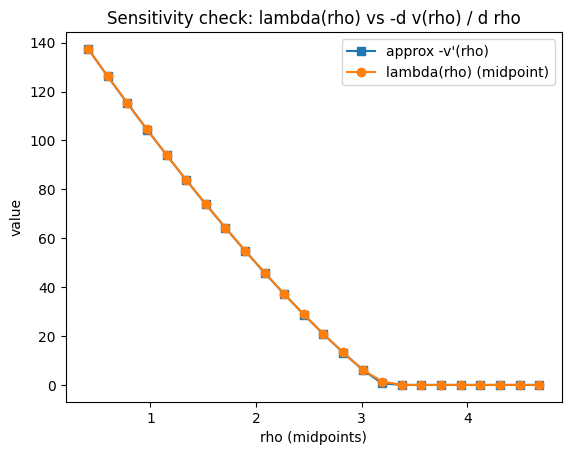


Interpretation hints:
- If lambda(rho) is near 0, the constraint is (numerically) inactive or almost inactive.
- If lambda(rho) is positive, the constraint is active (binding).
- Typically lambda(rho) drops toward 0 once rho reaches ||x_LS||2 (unconstrained regime).


In [35]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# -------------------------
# (a) Data generation (same style as earlier sections)
# -------------------------
m, n = 50, 10
np.random.seed(0)
A = np.random.randn(m, n)
x_true = np.random.randn(n)
eps = 0.1 * np.random.randn(m)
b = A @ x_true + eps

# -------------------------
# (b) Unconstrained LS (reference)
# -------------------------
x_var = cp.Variable(n)
prob_ls = cp.Problem(cp.Minimize(0.5 * cp.sum_squares(A @ x_var - b)))
prob_ls.solve(solver=cp.SCS, verbose=False)

x_ls = np.asarray(x_var.value).reshape(-1)
rho_ls = float(np.linalg.norm(x_ls))
r_ls = float(np.linalg.norm(A @ x_ls - b))

print("Reference (unconstrained LS):")
print(f"  ||x_LS||2 = {rho_ls:.6f}")
print(f"  r_LS      = {r_ls:.6f}")

# -------------------------
# (c) Build parameterized constrained problem ONCE
# -------------------------
rho = cp.Parameter(nonneg=True, name="rho")
x = cp.Variable(n, name="x")

obj = 0.5 * cp.sum_squares(A @ x - b)
constr = [cp.norm(x, 2) <= rho]          # keep a handle to this list for dual_value
prob = cp.Problem(cp.Minimize(obj), constr)

# -------------------------
# (d) Sweep rho values
# -------------------------
rho_min = 0.1 * rho_ls
rho_max = 1.5 * rho_ls
rho_vals = np.linspace(rho_min, rho_max, 25)

r_vals = []
xnorm_vals = []
lam_vals = []
status_vals = []

for rv in rho_vals:
    rho.value = rv
    prob.solve(solver=cp.SCS, verbose=False)

    status_vals.append(prob.status)

    if prob.status in ["optimal", "optimal_inaccurate"]:
        x_star = np.asarray(x.value).reshape(-1)
        r_vals.append(float(np.linalg.norm(A @ x_star - b)))
        xnorm_vals.append(float(np.linalg.norm(x_star)))

        # ---- This is the requested quantity: lambda(rho) ----
        lam = constr[0].dual_value
        lam_vals.append(float(lam) if lam is not None else np.nan)
    else:
        r_vals.append(np.nan)
        xnorm_vals.append(np.nan)
        lam_vals.append(np.nan)

r_vals = np.array(r_vals, dtype=float)
xnorm_vals = np.array(xnorm_vals, dtype=float)
lam_vals = np.array(lam_vals, dtype=float)

# -------------------------
# (e) Value function and numerical derivative check
# v(rho) = 0.5 * r(rho)^2
# dv/drho ≈ finite difference, compare with -lambda(rho)
# -------------------------
v_vals = 0.5 * (r_vals ** 2)

# finite difference slope for v
dv = np.diff(v_vals)
dr = np.diff(rho_vals)
dv_drho = dv / dr  # approximates v'(rho) at midpoints
minus_dv_drho = -dv_drho

rho_mid = 0.5 * (rho_vals[:-1] + rho_vals[1:])
lam_mid = 0.5 * (lam_vals[:-1] + lam_vals[1:])

# -------------------------
# Plots
# -------------------------
plt.figure()
plt.plot(rho_vals, lam_vals, marker="o")
plt.axvline(rho_ls, linestyle="--")
plt.xlabel("rho")
plt.ylabel("lambda(rho)  (dual value)")
plt.title("Problem 3(f): Dual variable lambda(rho) vs rho")
plt.show()

plt.figure()
plt.plot(rho_vals, xnorm_vals, marker="x", label="||x*(rho)||2")
plt.plot(rho_vals, rho_vals, linestyle="--", label="y = rho")
plt.axvline(rho_ls, linestyle="--", label="rho = ||x_LS||2")
plt.xlabel("rho")
plt.ylabel("norm")
plt.title("Constraint activity check using ||x*(rho)||2")
plt.legend()
plt.show()

plt.figure()
plt.plot(rho_mid, minus_dv_drho, marker="s", label="approx -v'(rho)")
plt.plot(rho_mid, lam_mid, marker="o", label="lambda(rho) (midpoint)")
plt.xlabel("rho (midpoints)")
plt.ylabel("value")
plt.title("Sensitivity check: lambda(rho) vs -d v(rho) / d rho")
plt.legend()
plt.show()

# -------------------------
# Quick textual interpretation
# -------------------------
print("\nInterpretation hints:")
print("- If lambda(rho) is near 0, the constraint is (numerically) inactive or almost inactive.")
print("- If lambda(rho) is positive, the constraint is active (binding).")
print("- Typically lambda(rho) drops toward 0 once rho reaches ||x_LS||2 (unconstrained regime).")


## Summary and interpretation of the dual variable λ(ρ)

From the numerical results, we observe the following behavior of the dual variable λ(ρ)
associated with the constraint $\|x\|_2 \le \rho$:

- For **small values of ρ**, the norm constraint is tight and active.
  In this regime, λ(ρ) takes relatively **large positive values**, indicating that the constraint
  strongly limits the solution and that relaxing it (increasing ρ) would significantly improve
  the optimal objective value.

- As **ρ increases**, the constraint becomes less restrictive.
  Consequently, λ(ρ) decreases, reflecting the fact that additional norm budget provides
  diminishing improvement in the optimal least-squares fit.

- When **ρ approaches or exceeds $\|x_{LS}\|_2$**, the unconstrained least-squares solution becomes feasible.
  In this regime, the constraint is **inactive**, and λ(ρ) is approximately zero.
  This means that increasing ρ further has almost no effect on the optimal objective value.

Overall, the dual variable λ(ρ) can be interpreted as a *shadow price* that quantifies
the sensitivity of the optimal value with respect to the constraint radius.
A large λ(ρ) indicates a strong trade-off between model norm and data fit,
while λ(ρ) close to zero indicates that the constraint no longer plays an active role.


## Problem 4 — Production planning model (overview and theory)

### Model description
We consider a production planning problem where a factory produces three products.
The decision variable
$$
x=\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}\in\mathbb{R}^3_+
$$
represents the production levels of the three products.

Each product yields unit profit
$$
c=\begin{bmatrix}4\\3\\2\end{bmatrix}.
$$

Production consumes three limited resources. The resource consumption matrix and the capacity vector are
$$
A=
\begin{bmatrix}
2&1&1\\
1&3&1\\
2&2&1
\end{bmatrix},
\qquad
b=
\begin{bmatrix}
100\\90\\120
\end{bmatrix}.
$$

The goal is to maximize total profit while respecting resource capacities and nonnegativity of production quantities.

---

### Primal problem (verbal description)
We want to find the production plan that maximizes total profit subject to:
1) each resource usage not exceeding its capacity, and  
2) nonnegative production quantities.

---

### Primal problem (matrix form)
The primal linear program is
$$
\begin{aligned}
\max_{x\ge 0}\quad & c^T x\\
\text{s.t.}\quad & Ax\le b.
\end{aligned}
$$

This is a profit maximization problem with linear inequality constraints representing resource limits.

---

### Dual derivation via the Lagrangian
Introduce Lagrange multipliers:
- $\lambda\in\mathbb{R}^3_+$ for the inequalities $Ax\le b$,
- $\nu\in\mathbb{R}^3_+$ for the inequalities $x\ge 0$ (equivalently, $-x\le 0$).

The Lagrangian is
$$
\begin{aligned}
L(x,\lambda,\nu)
&= c^T x + \lambda^T(b-Ax) - \nu^T x \\
&= \lambda^T b + (c - A^T\lambda - \nu)^T x.
\end{aligned}
$$

The dual function is
$$
g(\lambda,\nu)=\sup_x L(x,\lambda,\nu).
$$

For the supremum over $x$ to be finite, the coefficient of $x$ must be zero:
$$
c - A^T\lambda - \nu = 0,
$$
with $\lambda\ge 0$ and $\nu\ge 0$.

Eliminating $\nu$ gives the equivalent dual feasibility condition:
$$
A^T\lambda \ge c,\qquad \lambda\ge 0.
$$

Under these conditions, the Lagrangian becomes independent of $x$ and
$$
g(\lambda)=b^T\lambda.
$$

---

### Dual problem (explicit form)
Therefore, the dual LP is
$$
\begin{aligned}
\min_{\lambda\ge 0}\quad & b^T\lambda\\
\text{s.t.}\quad & A^T\lambda\ge c.
\end{aligned}
$$

The dual variables $\lambda$ can be interpreted as *shadow prices* for the resources.

---

### Feasibility and complementary slackness
Primal feasibility requires
$$
Ax \le b,\qquad x\ge 0.
$$

Dual feasibility requires
$$
A^T\lambda \ge c,\qquad \lambda\ge 0.
$$

Complementary slackness states that for each resource constraint:
$$
\lambda_i\,(b_i-(Ax)_i)=0,\qquad i=1,2,3.
$$

Thus, each resource constraint either binds (zero slack with positive multiplier) or is inactive (positive slack with zero multiplier).


## Problem 4 — Item 2: Numerical duality gap and complementary slackness

In this part we solve the primal LP and read the dual variables from CVXPY.

### 1) Strong duality / duality gap
Let:
- $p^\star$ be the optimal primal objective value,
- $d^\star$ be the optimal dual objective value.

For this LP (under standard regularity conditions), we expect strong duality:
$$
p^\star = d^\star,
$$
so the duality gap should be close to zero:
$$
\text{gap} = p^\star - d^\star \approx 0
$$
(up to solver tolerance).

### 2) Complementary slackness
For the resource constraints $Ax \le b$, define the slack vector
$$
s = b - A x^\star.
$$
If $\lambda^\star \ge 0$ are the dual multipliers for $Ax \le b$, complementary slackness predicts:
$$
\lambda_i^\star \, s_i = 0,\qquad i=1,2,3.
$$
Numerically, we check that each product $\lambda_i^\star s_i$ is very close to zero.


In [40]:
import numpy as np
import cvxpy as cp

# ---- Given data ----
c = np.array([4.0, 3.0, 2.0])
A = np.array([
    [2.0, 1.0, 1.0],
    [1.0, 3.0, 1.0],
    [2.0, 2.0, 1.0],
])
b = np.array([100.0, 90.0, 120.0])

def pick_solver():
    installed = set(cp.installed_solvers())
    for s in ["CLARABEL", "ECOS", "SCS"]:
        if s in installed:
            return s
    return None

solver = pick_solver()

# ---- Solve primal LP: maximize c^T x s.t. Ax<=b, x>=0 ----
x = cp.Variable(3, nonneg=True)
constr = [A @ x <= b]
prob = cp.Problem(cp.Maximize(c @ x), constr)

if solver is None:
    prob.solve(verbose=False)
else:
    prob.solve(solver=getattr(cp, solver), verbose=False)

x_star = np.asarray(x.value).reshape(-1)
p_star = float(prob.value)
status = prob.status

# ---- Extract dual multipliers for Ax<=b ----
lam_star = np.asarray(constr[0].dual_value).reshape(-1)  # size 3
d_star = float(b @ lam_star)
gap = float(p_star - d_star)

# ---- Complementary slackness check ----
slack = b - A @ x_star
cs = lam_star * slack

print("=== Item 2: Numerical checks ===")
print("status:", status)
print("x* =", x_star)
print("p* =", p_star)
print("lambda* =", lam_star)
print("d* = b^T lambda* =", d_star)
print("duality gap p*-d* =", gap)
print("\nslack s = b - A x* =", slack)
print("lambda* ⊙ s =", cs)
print("max |lambda_i*s_i| =", float(np.max(np.abs(cs))))


=== Item 2: Numerical checks ===
status: optimal
x* = [4.20000000e+01 1.60000000e+01 7.35767487e-08]
p* = 215.99999990812574
lambda* = [1.79999996e+00 3.99999979e-01 5.72938350e-08]
d* = b^T lambda* = 216.00000075768358
duality gap p*-d* = -8.495578356360056e-07

slack s = b - A x* = [3.44566189e-08 3.78424687e-08 4.00000006e+00]
lambda* ⊙ s = [6.20219125e-08 1.51369867e-08 2.29175343e-07]
max |lambda_i*s_i| = 2.2917534329333975e-07


## Problem 4 — Item 3: Shadow prices (dual variables) and sensitivity

The dual variables $\lambda^\star$ associated with the constraints $Ax \le b$ can be interpreted as *shadow prices*.
They quantify how much the optimal profit improves when we slightly relax a resource capacity.

For small perturbations $\Delta b$, a first-order sensitivity prediction is:
$$
p^\star(b+\Delta b) \approx p^\star(b) + (\lambda^\star)^T \Delta b.
$$

In particular, if we only change the first capacity $b_1$ by $\Delta b_1$, then:
$$
p^\star(b_1+\Delta b_1) - p^\star(b_1) \approx \lambda_1^\star \Delta b_1.
$$

We verify this numerically by solving the LP again after changing $b_1$ and comparing the measured change in profit
with the shadow-price prediction.


In [41]:
import numpy as np
import cvxpy as cp

def solve_primal_lp(b_vec):
    x = cp.Variable(3, nonneg=True)
    cons = [A @ x <= b_vec]
    prob = cp.Problem(cp.Maximize(c @ x), cons)

    solver = pick_solver()
    if solver is None:
        prob.solve(verbose=False)
    else:
        prob.solve(solver=getattr(cp, solver), verbose=False)

    x_val = np.asarray(x.value).reshape(-1)
    p_val = float(prob.value)
    lam_val = np.asarray(cons[0].dual_value).reshape(-1)
    return x_val, p_val, prob.status, lam_val

# Change only b1
b_new = b.copy()
b_new[0] = 105.0  # example: 100 -> 105
delta_b = b_new - b

x_new, p_new, st_new, lam_new = solve_primal_lp(b_new)

delta_p = p_new - p_star
shadow_pred = float(lam_star @ delta_b)

print("=== Item 3: Shadow price check ===")
print("Old b =", b)
print("New b =", b_new)
print("Δb =", delta_b)

print("\nOld p* =", p_star)
print("New p* =", p_new)
print("Δp (measured) =", delta_p)
print("λ*^T Δb (prediction) =", shadow_pred)
print("abs error |Δp - pred| =", abs(delta_p - shadow_pred))

print("\nNew solution x* =", x_new)
print("New lambda* =", lam_new)
print("new status:", st_new)


=== Item 3: Shadow price check ===
Old b = [100.  90. 120.]
New b = [105.  90. 120.]
Δb = [5. 0. 0.]

Old p* = 215.99999990812574
New p* = 224.9999999438784
Δp (measured) = 9.000000035752663
λ*^T Δb (prediction) = 8.999999787463713
abs error |Δp - pred| = 2.48288950288611e-07

New solution x* = [4.50000000e+01 1.50000000e+01 1.03745704e-07]
New lambda* = [1.37842416 0.18921208 0.52696981]
new status: optimal


## Problem 4 — Item 4: Plots for geometric intuition and sensitivity

We create visual intuition in two ways.

### (i) Feasible set slice in 2D
To visualize the feasible region, we consider the 2D slice $x_3=0$ and plot the feasible set in the $(x_1,x_2)$-plane.
We also draw iso-profit lines $4x_1+3x_2=\text{const}$ and mark the optimal point for this 2D slice.

Geometrically, the optimum occurs where the highest iso-profit line still intersects the feasible set.

### (ii) Sensitivity curve $p^{\star}(b_1)$
We vary the first capacity $b_1$ over a range and plot the optimal profit $p^{\star}(b_1)$.
We also overlay the linear approximation given by the shadow price:
$$
p^{\star}(b_1) \approx p^{\star}(100) + \lambda_1^{\star}(b_1-100).
$$
Typically, $p^{\star}(b_1)$ is piecewise-linear in $b_1$, and the shadow-price approximation is accurate locally around $b_1=100$.


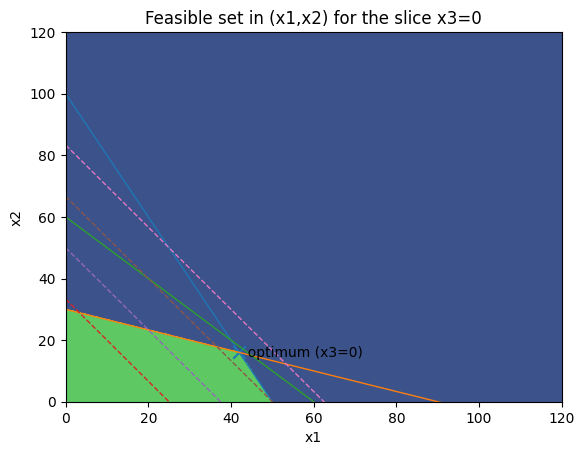

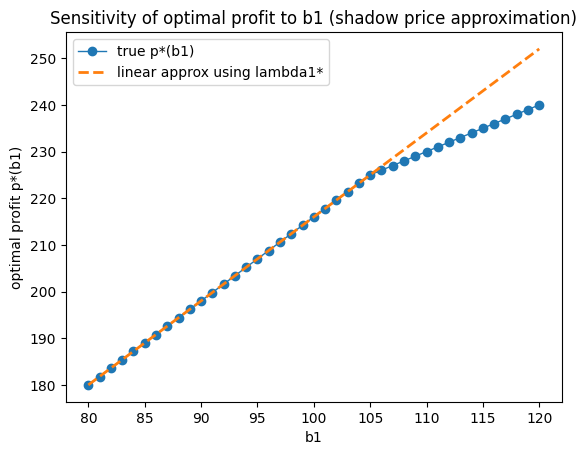

In [42]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# ---------- (i) Feasible set slice with x3 = 0 ----------
A2 = A[:, :2]   # columns for x1,x2
c2 = c[:2]

# Solve the 2D slice LP (x3=0)
x2v = cp.Variable(2, nonneg=True)
prob2 = cp.Problem(cp.Maximize(c2 @ x2v), [A2 @ x2v <= b])

solver = pick_solver()
if solver is None:
    prob2.solve(verbose=False)
else:
    prob2.solve(solver=getattr(cp, solver), verbose=False)

x2_star = np.asarray(x2v.value).reshape(-1)

# Grid feasibility mask
x1_grid = np.linspace(0, 120, 500)
x2_grid = np.linspace(0, 120, 500)
X1, X2 = np.meshgrid(x1_grid, x2_grid)
X = np.stack([X1, X2], axis=0).reshape(2, -1)  # (2,N)

feas = np.all((A2 @ X) <= b.reshape(-1, 1) + 1e-9, axis=0)
FEAS = feas.reshape(X1.shape)

plt.figure()
plt.contourf(X1, X2, FEAS, levels=[-0.5, 0.5, 1.5])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Feasible set in (x1,x2) for the slice x3=0")

# Constraint boundaries
plt.plot(x1_grid, 100 - 2*x1_grid, linewidth=1)             # 2x1 + x2 = 100
plt.plot(x1_grid, (90 - x1_grid)/3, linewidth=1)            # x1 + 3x2 = 90
plt.plot(x1_grid, 60 - x1_grid, linewidth=1)                # 2x1 + 2x2 = 120

# Iso-profit lines: 4x1 + 3x2 = const
profit_levels = [100, 150, 200, 250]
for k in profit_levels:
    plt.plot(x1_grid, (k - 4*x1_grid)/3, linestyle="--", linewidth=1)

# Mark optimum for the 2D slice
plt.scatter([x2_star[0]], [x2_star[1]], marker="x", s=80)
plt.text(x2_star[0], x2_star[1], "  optimum (x3=0)", va="center")

plt.xlim(0, 120)
plt.ylim(0, 120)
plt.show()

# ---------- (ii) p*(b1) curve + shadow-price linear approximation ----------
b1_vals = np.linspace(80, 120, 41)
p_vals = []

for b1 in b1_vals:
    bb = b.copy()
    bb[0] = float(b1)
    _, pval, st, _ = solve_primal_lp(bb)
    p_vals.append(pval if st in ["optimal", "optimal_inaccurate"] else np.nan)

p_vals = np.array(p_vals, dtype=float)

# Linear approximation around b1=100 using lambda1* from the original problem
p_lin = p_star + lam_star[0] * (b1_vals - 100.0)

plt.figure()
plt.plot(b1_vals, p_vals, marker="o", linewidth=1, label="true p*(b1)")
plt.plot(b1_vals, p_lin, linestyle="--", linewidth=2, label="linear approx using lambda1*")
plt.xlabel("b1")
plt.ylabel("optimal profit p*(b1)")
plt.title("Sensitivity of optimal profit to b1 (shadow price approximation)")
plt.legend()
plt.show()


## Problem 4 — Additional explanations and interpretations (summary)

### Strong duality and duality gap
In this linear program, both the primal and dual problems are feasible and bounded.
Therefore, strong duality holds and the optimal primal and dual objective values satisfy
$$
p^{\star} = d^{\star}.
$$
Numerically, the observed duality gap $p^{\star}-d^{\star}$ is very close to zero, with small deviations
only due to solver tolerances. This confirms the theoretical strong duality property for LPs.

---

### Complementary slackness (numerical interpretation)
For each resource constraint, the complementary slackness condition
$$
\lambda_i^{\star}(b_i - a_i^T x^{\star}) = 0
$$
is verified numerically.
Constraints that are active (nearly zero slack) typically have positive dual multipliers,
while constraints with significant slack have dual variables close to zero.
This confirms that only binding constraints influence the optimal solution.

---

### Shadow prices and sensitivity
The dual variables $\lambda^{\star}$ admit a natural economic interpretation as *shadow prices*.
In particular, $\lambda_1^{\star}$ measures the marginal increase in optimal profit when the
first resource capacity $b_1$ is slightly increased.

Numerical experiments show that for small perturbations of $b_1$,
$$
\Delta p^{\star} \approx \lambda_1^{\star}\,\Delta b_1,
$$
which validates the local linear sensitivity prediction provided by the dual variable.
For larger changes in $b_1$, this approximation may deteriorate because the active set of constraints
can change.

---

### Geometric interpretation and plots
The 2D slice of the feasible set (with $x_3=0$) illustrates how resource constraints intersect
to form a convex polytope.
Iso-profit lines indicate the direction of increasing profit, and the optimal solution occurs
at a vertex where at least one constraint is active.

The plot of $p^{\star}(b_1)$ as a function of $b_1$ is typically piecewise-linear.
The linear approximation based on the shadow price matches the true curve locally around $b_1=100$,
providing clear geometric intuition for dual sensitivity analysis.
